# Josh Nguyen Personal Project: Predicting Sydney House Prices Using Machine Learning

The goal of this project is to develop a machine learning model to predict house price in Sydney using the data set we got from Kaggle.

Link to data set: https://www.kaggle.com/datasets/alexlau203/sydney-house-prices?resource=download

## Data Preprocessing

### Load and explore data


In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [204]:
# Show the plot
df = pd.read_csv("sydney_house_price.csv")
df

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1900000,31/12/21,Kellyville,3,4,2,540,House,27971,46228,18.645,-33.69583,150.95622,78,0.1,220.1,30.08
11156,1300000,31/12/21,Seven Hills,3,7,2,1208,House,19326,33540,9.629,-33.77743,150.94272,38,0.1,220.1,26.58
11157,1025000,31/12/21,Sydney,2,2,1,129,Apartment / Unit / Flat,17252,35412,2.940,-33.86794,151.20998,65,0.1,220.1,0.31
11158,1087500,1/1/22,Prestons,2,4,2,384,House,15313,36244,9.215,-33.94155,150.87334,28,0.1,220.1,32.26


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

Seems like we are not missing any values, let's visualise the relationship between the variables and price to see the varibes that best explain price. But first lets clean and prepare the data.

In [206]:
# Convert date_sold to year_sold with the year the house was sold
df["date_sold"] = pd.to_datetime(df["date_sold"], dayfirst=True)
df["year_sold"] = df["date_sold"].dt.year
df.drop(["date_sold"], axis=1, inplace=True)

df

/var/folders/nb/jqk45f293z3bx3hy7zrjcv0c0000gn/T/ipykernel_11574/185423486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_sold"] = pd.to_datetime(df["date_sold"], dayfirst=True)


,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,year_sold
0,530000,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05,2016
1,525000,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54,2016
2,480000,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59,2016
3,452000,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12,2016
4,365500,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1900000,Kellyville,3,4,2,540,House,27971,46228,18.645,-33.69583,150.95622,78,0.1,220.1,30.08,2021
11156,1300000,Seven Hills,3,7,2,1208,House,19326,33540,9.629,-33.77743,150.94272,38,0.1,220.1,26.58,2021
11157,1025000,Sydney,2,2,1,129,Apartment / Unit / Flat,17252,35412,2.940,-33.86794,151.20998,65,0.1,220.1,0.31,2021
11158,1087500,Prestons,2,4,2,384,House,15313,36244,9.215,-33.94155,150.87334,28,0.1,220.1,32.26,2022


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'num_bath'}>,
        <Axes: title={'center': 'num_bed'}>,
        <Axes: title={'center': 'num_parking'}>],
       [<Axes: title={'center': 'property_size'}>,
        <Axes: title={'center': 'suburb_population'}>,
        <Axes: title={'center': 'suburb_median_income'}>,
        <Axes: title={'center': 'suburb_sqkm'}>],
       [<Axes: title={'center': 'suburb_lat'}>,
        <Axes: title={'center': 'suburb_lng'}>,
        <Axes: title={'center': 'suburb_elevation'}>,
        <Axes: title={'center': 'cash_rate'}>],
       [<Axes: title={'center': 'property_inflation_index'}>,
        <Axes: title={'center': 'km_from_cbd'}>,
        <Axes: title={'center': 'year_sold'}>, <Axes: >]], dtype=object)

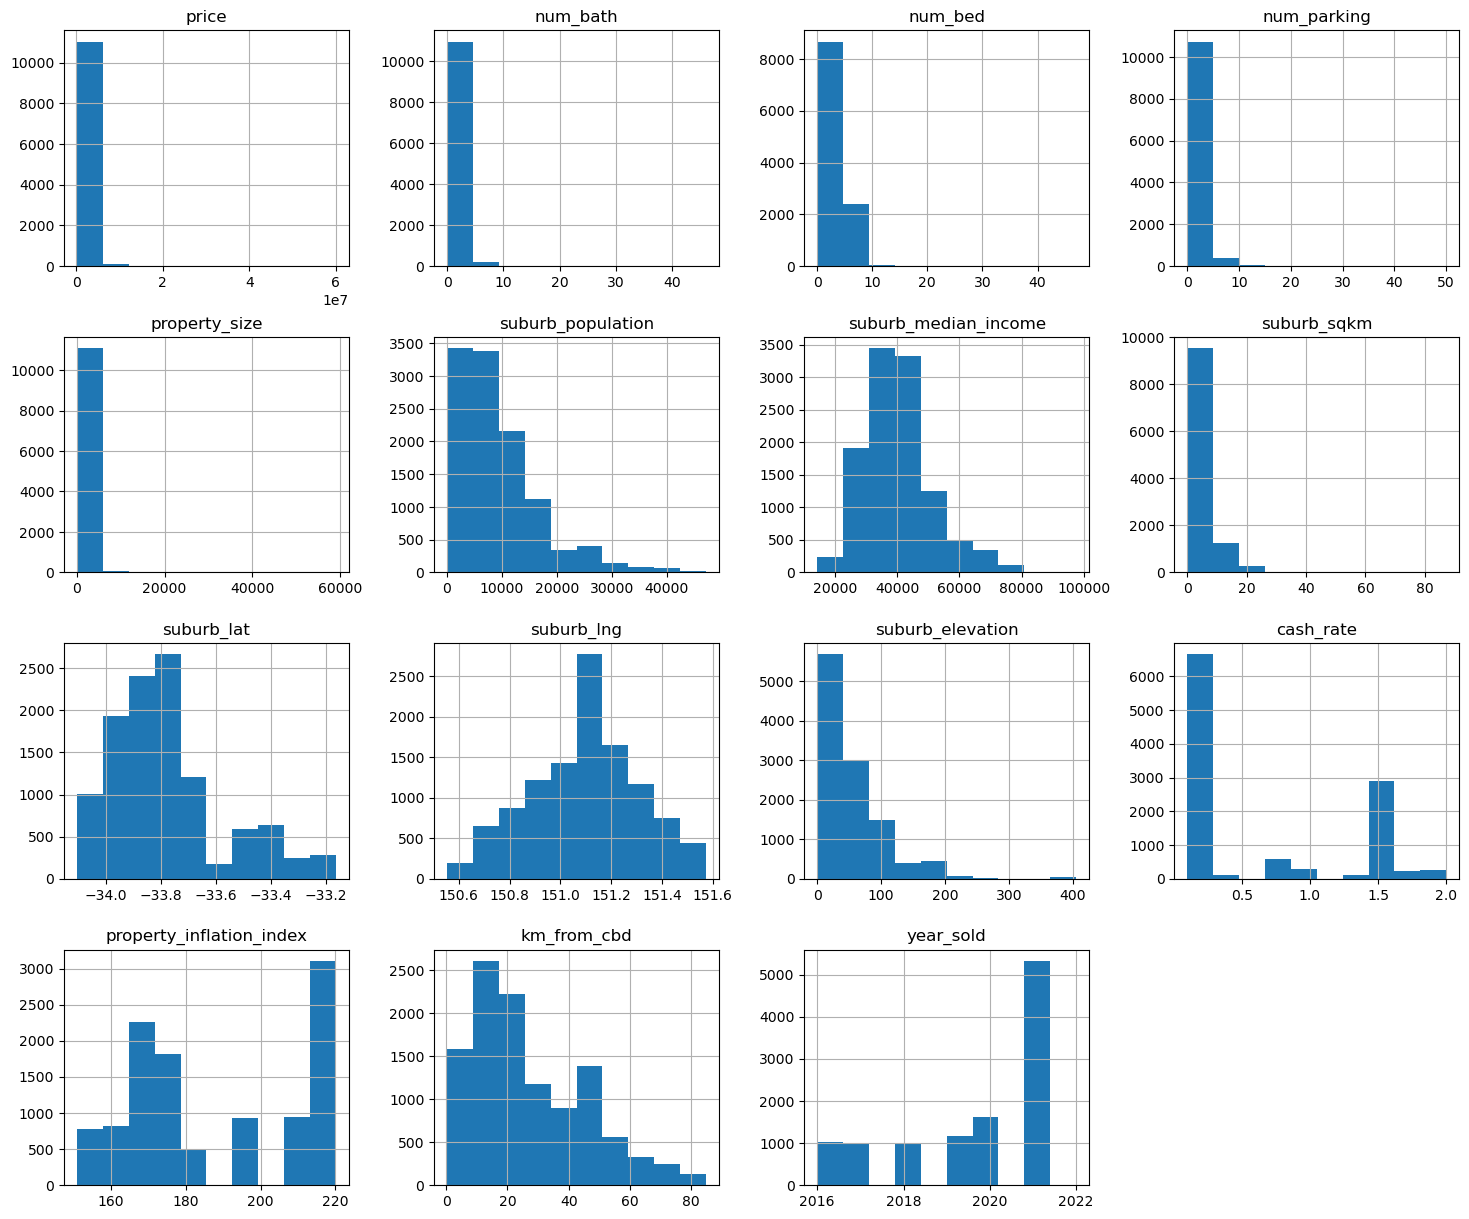

In [207]:
df.hist(figsize=(18,15))

### Data preparation
Let's turn our catagorical variables into integers so that it can be used for our model.

In [208]:
suburb_dummies = pd.get_dummies(df.suburb).astype(int)
type_dummies = pd.get_dummies(df.type).astype(int)


In [209]:
df_ln = df.join(type_dummies)
df_ln.drop(["suburb", "type"], axis=1, inplace=True)
df_ln

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,...,New Apartments / Off the Plan,New House & Land,New land,Rural,Semi-Detached,Studio,Terrace,Townhouse,Vacant land,Villa
0,530000,4,4,2,1351,7093,29432,9.914,-33.47252,151.40208,...,0,0,0,0,0,0,0,0,0,0
1,525000,2,4,2,594,2538,24752,1.397,-33.21772,151.55237,...,0,0,0,0,0,0,0,0,0,0
2,480000,2,4,2,468,2028,31668,1.116,-33.32678,151.44557,...,0,0,0,0,0,0,0,0,0,0
3,452000,1,3,1,344,9835,32292,4.055,-34.05375,150.83957,...,0,0,0,0,0,0,0,0,0,0
4,365500,0,0,0,1850,2200,45084,1.497,-33.45608,151.43598,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1900000,3,4,2,540,27971,46228,18.645,-33.69583,150.95622,...,0,0,0,0,0,0,0,0,0,0
11156,1300000,3,7,2,1208,19326,33540,9.629,-33.77743,150.94272,...,0,0,0,0,0,0,0,0,0,0
11157,1025000,2,2,1,129,17252,35412,2.940,-33.86794,151.20998,...,0,0,0,0,0,0,0,0,0,0
11158,1087500,2,4,2,384,15313,36244,9.215,-33.94155,150.87334,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

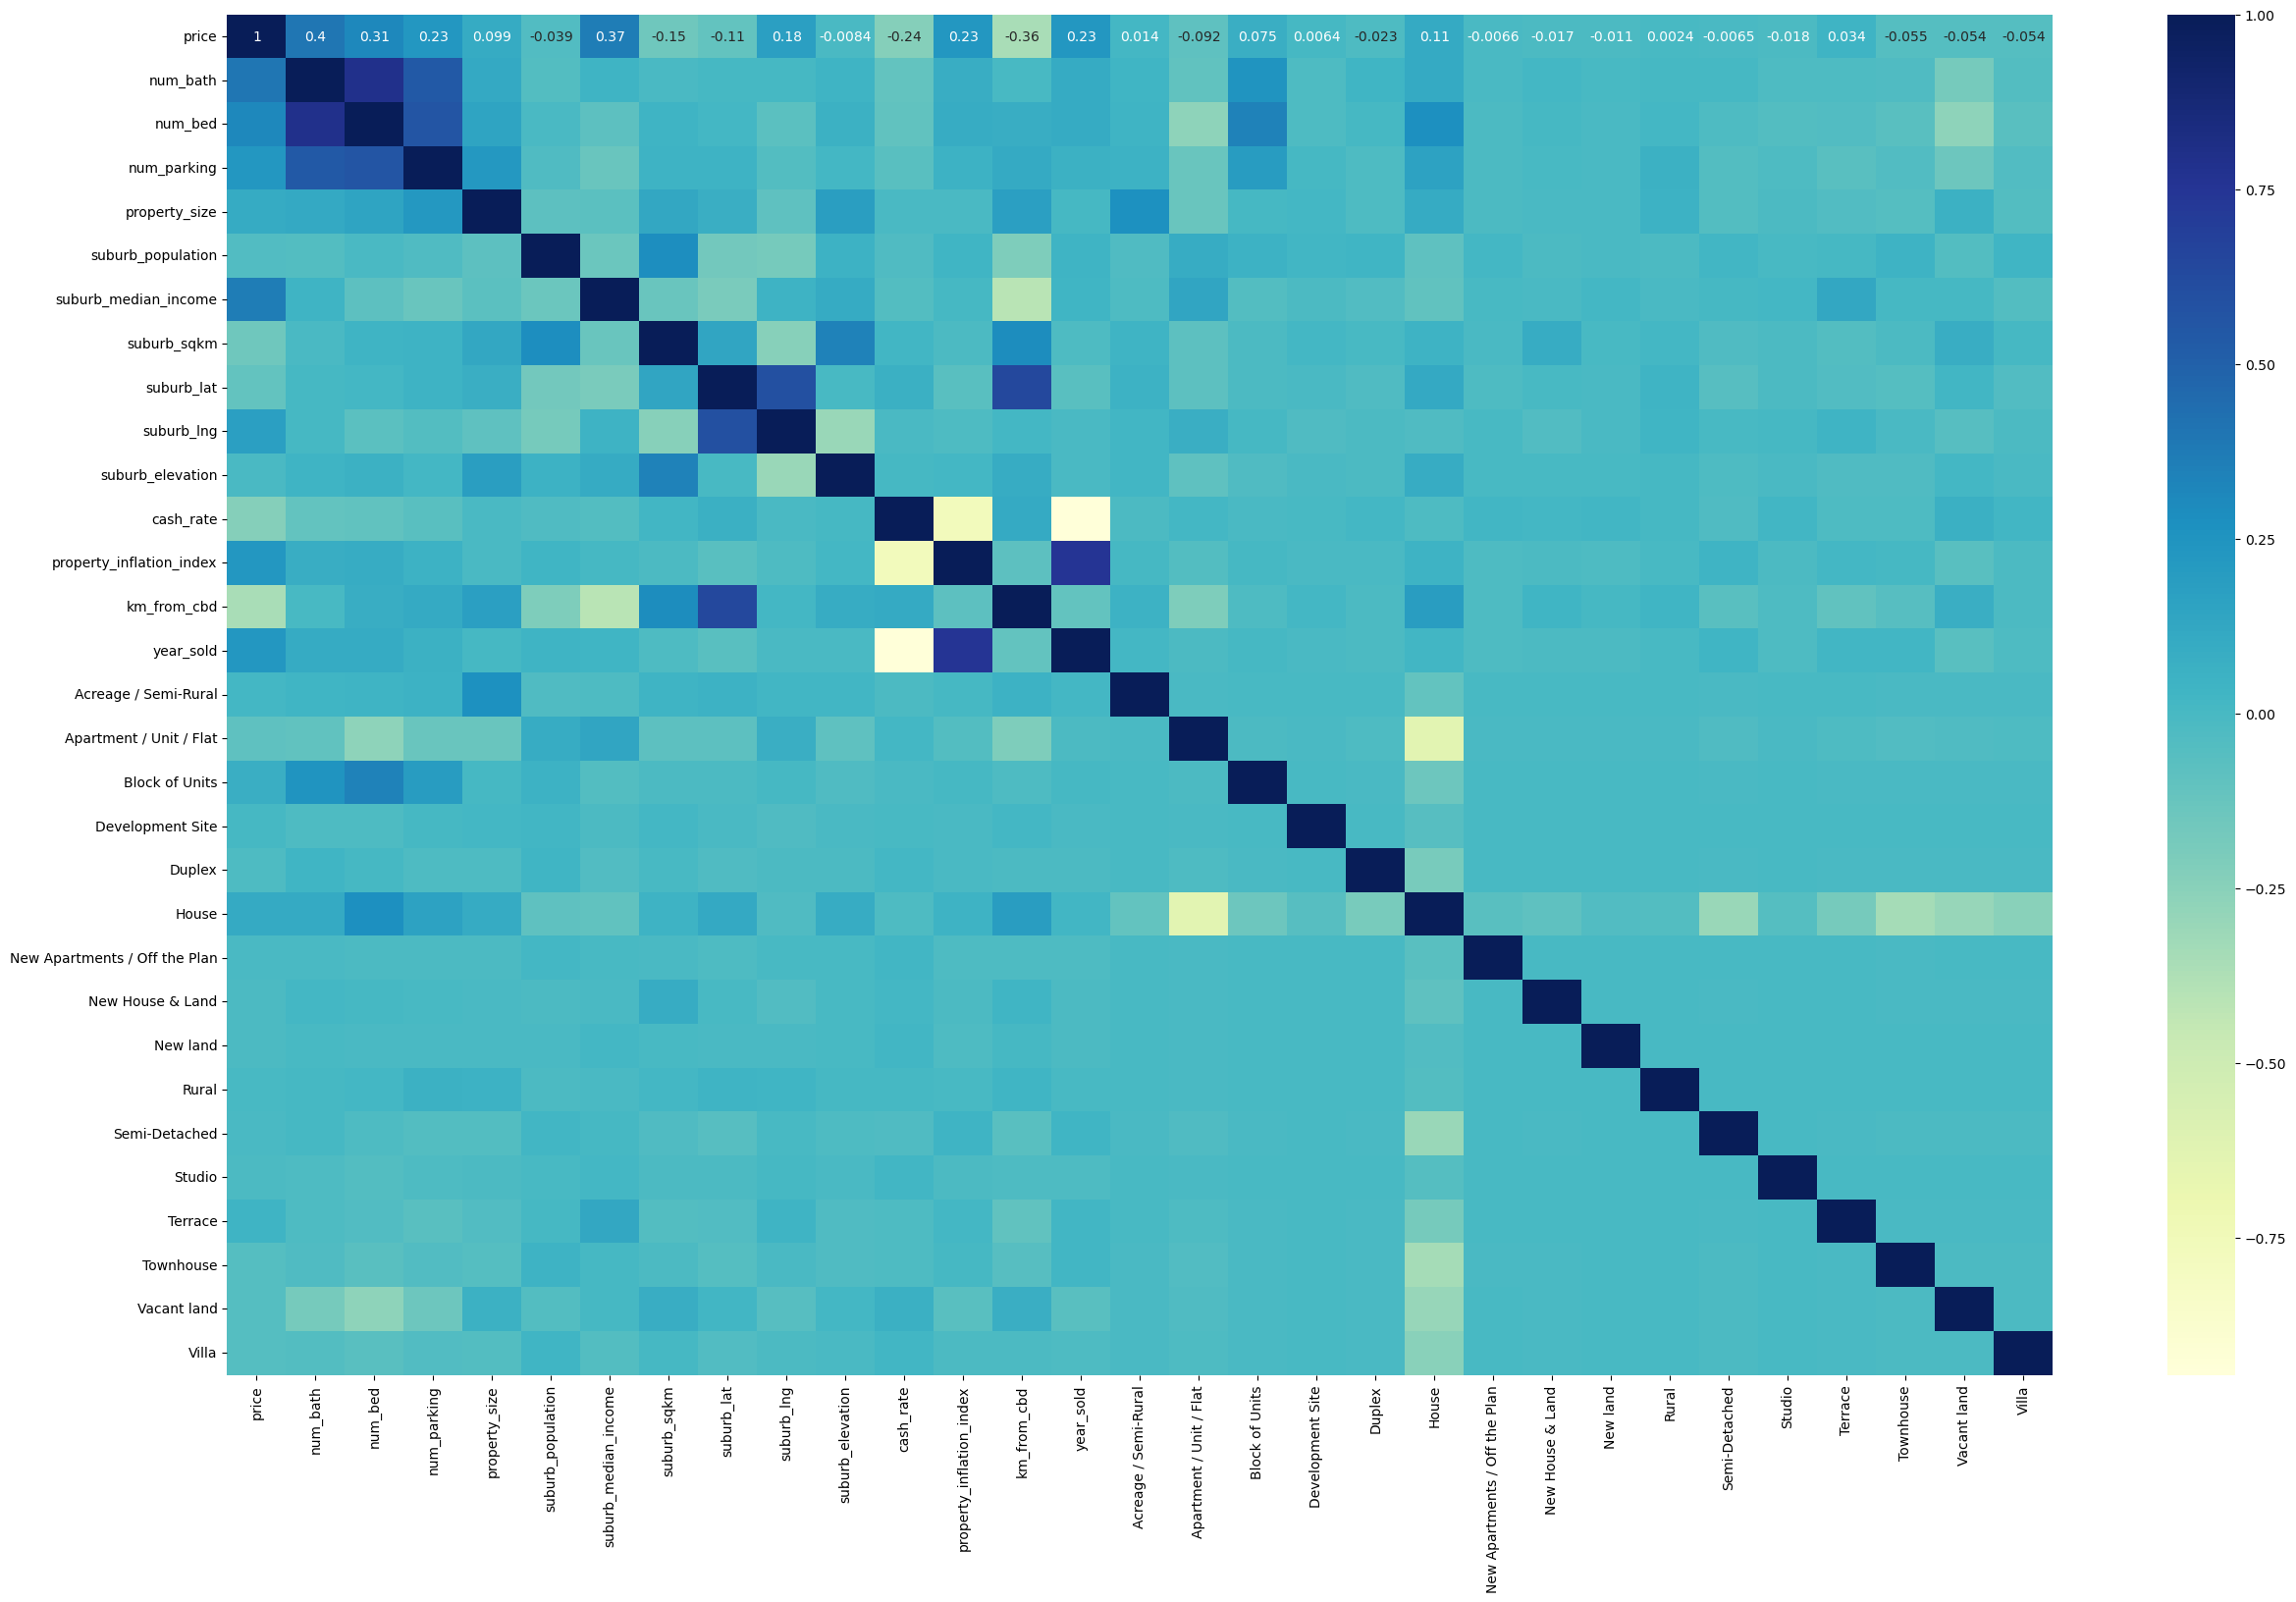

In [210]:
plt.figure(figsize=(30,18))
sns.heatmap(df_ln.corr(), annot=True, cmap="YlGnBu")

In [211]:
df_ln = df_ln.join(suburb_dummies)

### Data splitting

In [212]:
from sklearn.model_selection import train_test_split
y = df_ln["price"]
x = df_ln.drop(["price"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Linear regression

### Model building and performance evaluation

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


lm = LinearRegression()

lm.fit(x_train, y_train)

y_lm_pred = lm.predict(x_test)

mae_lm = mean_absolute_error(y_test, y_lm_pred)
mse_lm = mean_squared_error(y_test, y_lm_pred)
r2 = r2_score(y_test, y_lm_pred)


print("Mean Absolute Error: ", mae_lm)
print("Mean Squared Error: ", mse_lm)
print("R2 Score: ", r2)

Mean Absolute Error:  416905.36796358775
Mean Squared Error:  595497836037.4246
R2 Score:  0.5625227524601313


## Random forest

### Model building and performance evaluation

In [220]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)


RandomForestRegressor()

In [221]:
rf.score(x_test, y_test)

0.6808022344175798

## Parameters tunning


Seems like we are getting better results with Random Forest Regressor, let's try hyper tunning the parameters to see if we can get even better results.

In [219]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [224]:
best_forest = grid_search.best_estimator_
print(best_forest)

RandomForestRegressor(max_depth=20, min_samples_split=10)


In [223]:
best_forest.score(x_test, y_test)

0.681586861253376

With the parameter tunning, we have been able to slightly increase the accuracy of the model.